# Notes for myself
1. Stem and unigram DEFINENTLY IS BETTER -> 81%
2. I Should add all they variations of stem/lem
3. Having a thesaurus of words would greatyl help. Dry/Evaporate for example are the same. It would be really cool to allow a teacher to add in these words. Def an area for improvement

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS, Birch
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# 89%
data = pd.read_csv(
    '../data/feature_sets/saltwaterdata.csv'
)
doc = pd.read_csv(
    '../data/feature_sets/saltwaterdoc.csv'
)

# # 52%
# data = pd.read_csv(
#     '../data/feature_sets/rubberbanddata.csv'
# )
# doc = pd.read_csv(
#     '../data/feature_sets/rubberbanddoc.csv'
# )

# # 62%
# data = pd.read_csv(
#     '../data/feature_sets/pitchesdata.csv'
# )
# doc = pd.read_csv(
#     '../data/feature_sets/pitchesdoc.csv'
# )
# 
# 59%
data = pd.read_csv(
    '../data/feature_sets/sugardata.csv'
)
doc = pd.read_csv(
    '../data/feature_sets/sugardoc.csv'
)
# 
# # 76%
# data = pd.read_csv(
#     '../data/feature_sets/standarddata.csv'
# )
# doc = pd.read_csv(
#     '../data/feature_sets/standarddoc.csv'
# )
# 
# # 97%
# data = pd.read_csv(
#     '../data/feature_sets/celciusdata.csv'
# )
# doc = pd.read_csv(
#     '../data/feature_sets/celciusdoc.csv'
# )
# # 
# # 75%
# data = pd.read_csv(
#     '../data/feature_sets/loose_wiresdata.csv'
# )
# doc = pd.read_csv(
#     '../data/feature_sets/loose_wiresdoc.csv'
# )

# 43%%
data = pd.read_csv(
    '../data/feature_sets/batterydata.csv'
)
doc = pd.read_csv(
    '../data/feature_sets/batterydoc.csv'
)

# # 66%%
# data = pd.read_csv(
#     '../data/feature_sets/cleardata.csv'
# )
# doc = pd.read_csv(
#     '../data/feature_sets/cleardoc.csv'
# )

# # 72%
# data = pd.read_csv(
#     '../data/feature_sets/circuitdata.csv'
# )
# doc = pd.read_csv(
#     '../data/feature_sets/circuitdoc.csv'
# )

# # 60%
# data = pd.read_csv(
#     '../data/feature_sets/heat_sinkdata.csv'
# )
# doc = pd.read_csv(
#     '../data/feature_sets/heat_sinkdoc.csv'
# )

# # 49%
# data = pd.read_csv(
#     '../data/feature_sets/sammydata.csv'
# )
# doc = pd.read_csv(
#     '../data/feature_sets/sammydoc.csv'
# )

In [24]:
nlp.doc.head()

,student_answer,teacher_answer,label,question_id,q_answer,q_answer_ordered,q_stopwords,q_stopwords_ordered,q_stemmed,q_stem_ordered,q_lemm,q_lemm_ordered,cluster
0,She would put and back it to a D-cell.,Wendy should hook one end of the wire to the n...,1,122,She would put and back it to a D-cell.,a and back dcell it put she to would,dcell,dcell,dcell,dcell,dcell,dcell,0
1,Stick it into the clips and close the switch.,Wendy should hook one end of the wire to the n...,0,122,She would put and back it to a D-cell.,and clips close into it stick switch the the,stick clips close switch,clips close stick switch,stick clip close switch,clip close stick switch,stick clip close switch,clip close stick switch,0
2,She should hook the extra wire from the wrappi...,Wendy should hook one end of the wire to the n...,0,122,She would put and back it to a D-cell.,a and and and battery connect connect dcell dc...,hook extra wire wrapping connect wires switch ...,battery connect connect dcell dcell extra hook...,hook extra wire wrap connect wire switch dcell...,batteri connect connect dcell dcell extra hook...,hook extra wire wrapping connect wire switch d...,battery connect connect dcell dcell extra hook...,0
3,Wendy will connect the wire to a D-cell batter...,Wendy should hook one end of the wire to the n...,1,122,She would put and back it to a D-cell.,a and battery connect dcell optional switch sw...,wendy connect wire dcell battery switch switch...,battery connect dcell optional switch switch w...,wendi connect wire dcell batteri switch switch...,batteri connect dcell option switch switch wen...,wendy connect wire dcell battery switch switch...,battery connect dcell optional switch switch w...,1
4,She should hook it to a D-cell.,Wendy should hook one end of the wire to the n...,1,122,She would put and back it to a D-cell.,a dcell hook it she should to,hook dcell,dcell hook,hook dcell,dcell hook,hook dcell,dcell hook,0


In [21]:
from ClusteringNLP import Clustering_NLP
nlp = Clustering_NLP(data, doc)
nlp.correct_cluster_labels()
nlp.accuracy()

0.4358974358974359

In [22]:
confusion_matrix(nlp.doc['label'], nlp.doc.cluster)

array([[ 9,  6],
       [16,  8]], dtype=int64)

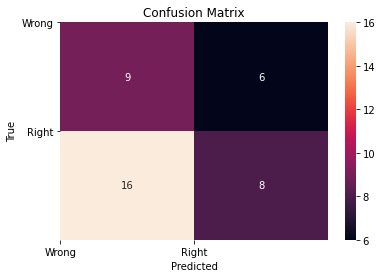

In [42]:
import seaborn as sns
sns.heatmap(confusion_matrix(nlp.doc['label'], nlp.doc.cluster), annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.yticks(ticks = [0,1], labels = ['Wrong', 'Right'], rotation = 0)
plt.xticks(ticks = [0,1], labels = ['Wrong', 'Right'])
plt.show()

In [5]:
nlp.new_answers

,student_answer,teacher_answer,q_answer,q_answer_ordered,q_stopwords,q_stopwords_ordered,q_stemmed,q_stem_ordered,q_lemm,q_lemm_ordered,cluster,wordcount,sentence_count,normal_g_similarity,normal_j_similarity,normal_c_similarity,normal_ordered_g_similarity,normal_ordered_j_similarity,normal_ordered_c_similarity,stem_g_similarity,stem_j_similarity,stem_c_similarity,stem_ordered_g_similarity,stem_ordered_j_similarity,stem_ordered_c_similarity,lem_g_similarity,lem_j_similarity,lem_c_similarity,lem_ordered_g_similarity,lem_ordered_j_similarity,lem_ordered_c_similarity,q_answer_has_sammys,q_answer_has_different,q_answer_has_materials,q_answer_has_would,q_answer_has_make,q_answer_has_very,q_answer_has_sounds,q_answer_has_size,q_answer_has_wood,q_answer_has_similar,q_answer_has_sammys_different,q_answer_has_different_materials,q_answer_has_materials_would,q_answer_has_would_make,q_answer_has_make_very,q_answer_has_very_different,q_answer_has_different_sounds,q_answer_has_sounds_different,q_answer_has_different_size,q_answer_has_size_wood,q_answer_has_wood_would,q_answer_has_very_similar,q_answer_has_similar_sounds,q_answer_has_sammys_different_materials,q_answer_has_different_materials_would,q_answer_has_materials_would_make,q_answer_has_would_make_very,q_answer_has_make_very_different,q_answer_has_very_different_sounds,q_answer_has_different_sounds_different,q_answer_has_sounds_different_size,q_answer_has_different_size_wood,q_answer_has_size_wood_would,q_answer_has_wood_would_make,q_answer_has_make_very_similar,q_answer_has_very_similar_sounds,q_answer_ordered_has_different,q_answer_ordered_has_make,q_answer_ordered_has_materials,q_answer_ordered_has_sammys,q_answer_ordered_has_similar,q_answer_ordered_has_size,q_answer_ordered_has_sounds,q_answer_ordered_has_very,q_answer_ordered_has_wood,q_answer_ordered_has_would,q_answer_ordered_has_different_different,q_answer_ordered_has_different_make,q_answer_ordered_has_make_make,q_answer_ordered_has_make_materials,q_answer_ordered_has_materials_sammys,q_answer_ordered_has_sammys_similar,q_answer_ordered_has_similar_size,q_answer_ordered_has_size_sounds,q_answer_ordered_has_sounds_sounds,q_answer_ordered_has_sounds_very,q_answer_ordered_has_very_very,q_answer_ordered_has_very_wood,q_answer_ordered_has_wood_would,q_answer_ordered_has_would_would,q_answer_ordered_has_different_different_different,q_answer_ordered_has_different_different_make,q_answer_ordered_has_different_make_make,q_answer_ordered_has_make_make_materials,q_answer_ordered_has_make_materials_sammys,q_answer_ordered_has_materials_sammys_similar,q_answer_ordered_has_sammys_similar_size,q_answer_ordered_has_similar_size_sounds,q_answer_ordered_has_size_sounds_sounds,q_answer_ordered_has_sounds_sounds_very,q_answer_ordered_has_sounds_very_very,q_answer_ordered_has_very_very_wood,q_answer_ordered_has_very_wood_would,q_answer_ordered_has_wood_would_would,q_stopwords_has_sammys,q_stopwords_has_different,q_stopwords_has_materials,q_stopwords_has_sounds,q_stopwords_has_size,q_stopwords_has_wood,q_stopwords_has_similar,q_stopwords_has_sammys_different,q_stopwords_has_different_materials,q_stopwords_has_materials_different,q_stopwords_has_different_sounds,q_stopwords_has_sounds_different,q_stopwords_has_different_size,q_stopwords_has_size_wood,q_stopwords_has_wood_similar,q_stopwords_has_similar_sounds,q_stopwords_has_sammys_different_materials,q_stopwords_has_different_materials_different,q_stopwords_has_materials_different_sounds,q_stopwords_has_different_sounds_different,q_stopwords_has_sounds_different_size,q_stopwords_has_different_size_wood,q_stopwords_has_size_wood_similar,q_stopwords_has_wood_similar_sounds,q_stopwords_ordered_has_different,q_stopwords_ordered_has_materials,q_stopwords_ordered_has_sammys,q_stopwords_ordered_has_similar,q_stopwords_ordered_has_size,q_stopwords_ordered_has_sounds,q_stopwords_ordered_has_wood,q_stopwords_ordered_has_different_different,q_stopwords_ordered_has_different_materials,q_stopwords_ordered

In [6]:
Answer = 'Let the water dry up leaving the salt'
nlp.group_new_answer(Answer)
nlp.score_new_sentences(nlp.new_answers.iloc[:, 11:])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Hierarchical Clustering

In [7]:
model = AgglomerativeClustering(2).fit(data)
model.labels_

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [8]:
doc['cluster'] = (model.labels_ - 1)**2
accuracy_score(doc.label, doc.cluster)

0.6756756756756757

## DBSCAN
Good at getting just goods, assuming - = bads, but missing the middle section

In [108]:
model = DBSCAN(.8).fit(data)
model.labels_

array([ 0,  1,  2,  3,  3,  1,  0,  2,  1,  1,  1,  3,  1,  3,  3,  3,  3,
        2,  2,  1,  0,  3,  0,  2, -1,  0,  1,  3,  3,  1,  0,  1,  2,  1,
        0, -1,  2], dtype=int64)

In [109]:
doc['cluster_raw'] = model.labels_


In [111]:
doc['cluster2'] = doc.cluster_raw.apply(lambda x: 1 if x == 2 else 0 if x == -1 else -1)

In [113]:
doc.tail()

,student_answer,teacher_answer,label,question_id,q_stopwords,q_stemmed,q_stem_ordered,q_lemm,q_lemm_ordered,q_stopwords_ordered,cluster1,cluster_raw,cluster2
32,We put the water in a clear cup and let it sit...,"The water was evaporated, leaving the salt.",1,25,water clear cup let sit water evaporated salt ...,water clear cup let sit water evapor salt stay,clear cup evapor let salt sit stay water water,water clear cup let sit water evaporated salt ...,clear cup evaporated let salt sit stayed water...,clear cup evaporated let salt sit stayed water...,1,2,1
33,I put some water in a dish and let the water e...,"The water was evaporated, leaving the salt.",1,25,water dish let water evaporate salt stay,water dish let water evapor salt stay,dish evapor let salt stay water water,water dish let water evaporate salt stay,dish evaporate let salt stay water water,dish evaporate let salt stay water water,1,1,-1
34,Evaporate.,"The water was evaporated, leaving the salt.",0,25,evaporate,evapor,evapor,evaporate,evaporate,evaporate,0,0,-1
35,The crystals were salt.,"The water was evaporated, leaving the salt.",0,25,crystals salt,crystal salt,crystal salt,crystal salt,crystal salt,crystals salt,0,-1,0
36,"The water was evaporated, leaving the salt.","The water was evaporated, leaving the salt.",1,25,water evaporated leaving salt,water evapor leav salt,evapor leav salt water,water evaporated leaving salt,evaporated leaving salt water,evaporated leaving salt water,1,2,1


## Optics

In [59]:
model = OPTICS().fit(data)
model.labels_

array([ 0,  2,  3,  1,  1,  2,  0,  3,  2,  2,  2, -1,  2, -1, -1,  1,  1,
        3,  3,  2,  0,  1,  0,  3,  3,  0,  2,  1, -1,  2,  0,  2,  3,  2,
        0, -1,  3])

In [60]:
doc['raw_cluster3'] = model.labels_

In [61]:
doc['cluster3'] = doc.raw_cluster3.apply(lambda x: 1 if x == 3 else 0 if x == -1 else -1)

## Playing with Cluster Voting

In [118]:
doc['sum'] = doc.cluster1+doc.cluster2+doc.cluster3

In [121]:
doc['guess'] = doc['sum'].apply(lambda x: 1 if x >= 1 else 0)



In [122]:
print(accuracy_score(doc.label, doc.guess))

0.6756756756756757


In [123]:
doc.head(50)

,student_answer,teacher_answer,label,question_id,q_stopwords,q_stemmed,q_stem_ordered,q_lemm,q_lemm_ordered,q_stopwords_ordered,cluster1,cluster_raw,cluster2,raw_cluster3,cluster3,sum,guess
0,By letting it sit in a dish for a day.,"The water was evaporated, leaving the salt.",0,25,letting sit dish day,let sit dish day,day dish let sit,letting sit dish day,day dish letting sit,day dish letting sit,0,0,-1,0,-1,-2,0
1,Let the water evaporate and the salt is left b...,"The water was evaporated, leaving the salt.",1,25,let water evaporate salt left,let water evapor salt left,evapor left let salt water,let water evaporate salt left,evaporate left let salt water,evaporate left let salt water,1,1,-1,2,-1,-1,0
2,The water evaporated and left salt crystals.,"The water was evaporated, leaving the salt.",1,25,water evaporated left salt crystals,water evapor left salt crystal,crystal evapor left salt water,water evaporated left salt crystal,crystal evaporated left salt water,crystals evaporated left salt water,1,2,1,3,1,3,1
3,I saw a pinkish grayish color that was blockin...,"The water was evaporated, leaving the salt.",0,25,saw pinkish grayish color blocking water,saw pinkish grayish color block water,block color grayish pinkish saw water,saw pinkish grayish color blocking water,blocking color grayish pinkish saw water,blocking color grayish pinkish saw water,0,3,-1,1,-1,-2,0
4,You have to slowly tip the vial for only the w...,"The water was evaporated, leaving the salt.",0,25,slowly tip vial water,slowli tip vial water,slowli tip vial water,slowly tip vial water,slowly tip vial water,slowly tip vial water,0,3,-1,1,-1,-2,0
5,"By pouring the water and salt into the thing, ...","The water was evaporated, leaving the salt.",1,25,pouring water salt thing letting water evaporate,pour water salt thing let water evapor,evapor let pour salt thing water water,pouring water salt thing letting water evaporate,evaporate letting pouring salt thing water water,evaporate letting pouring salt thing water water,1,1,-1,2,-1,-1,0
6,By slowly pouring it in a tray.,"The water was evaporated, leaving the salt.",0,25,slowly pouring tray,slowli pour tray,pour slowli tray,slowly pouring tray,pouring slowly tray,pouring slowly tray,0,0,-1,0,-1,-2,0
7,The water evaporated so there was only salt left.,"The water was evaporated, leaving the salt.",1,25,water evaporated salt left,water evapor salt left,evapor left salt water,water evaporated salt left,evaporated left salt water,evaporated left salt water,1,2,1,3,1,3,1
8,We put the water with the salt in it and put i...,"The water was evaporated, leaving the salt.",1,25,water salt outside water evaporate,water salt outsid water evapor,evapor outsid salt water water,water salt outside water evaporate,evaporate outside salt water water,evaporate outside salt water water,1,1,-1,2,-1,-1,0
9,I separated the salt from the water because th...,"The water was evaporated, leaving the salt.",0,25,separated salt water salt rocks water,separ salt water salt rock water,rock salt salt separ water water,separated salt water salt rock water,rock salt salt separated water water,rocks salt salt separated water water,1,1,-1,2,-1,-1,0


# Visualization

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [9]:
pca = PCA(n_components = 2)

In [16]:
comps = pca.fit_transform(nlp.data)

In [26]:
clf = KMeans(2).fit(comps)

In [31]:
clf.cluster_centers_

array([[-0.77759611,  0.30209457],
       [ 1.0205949 , -0.39649912]])

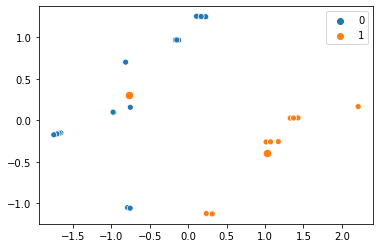

In [40]:
sns.scatterplot(
    x = comps[:,0],
    y = comps[:,1],
    hue= clf.labels_,
)
sns.scatterplot(
    x = clf.cluster_centers_[:,0],
    y = clf.cluster_centers_[:,1],
    ec = 'black',
    s= 70,
    palette = ['black']
)
plt.show()

In [25]:
vals

KMeans(n_clusters=2)